In [2]:
import itertools
import matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [33]:
### Just a quick scoping of the results (and getting the confusion matrix for the plots below):

file = "../data/df.csv"
df = pd.read_csv(file)
print(df['Level'].value_counts())

from pycm import ConfusionMatrix
from sklearn.metrics import recall_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, accuracy_score,\
    precision_score, confusion_matrix, brier_score_loss
y_true = df['gt_pf'].astype(int).to_numpy()
y_pred = df['Pfirrmann'].astype(int).to_numpy()

cm = ConfusionMatrix(y_true, y_pred)
print(cm)
print("NIR: ", cm.NIR)
print("MCC: ", cm.MCC)
print("Micro specificty: ", cm.TNR_Micro)
print("Micro sensitivity: ", cm.TPR_Micro)

print("Un-weighted Kappa: ", cohen_kappa_score(y_true, y_pred))
print("Linearly weighted Kappa: ", cohen_kappa_score(y_true, y_pred, weights = "linear"))
print("Quadratic weighted Kappa: ", cohen_kappa_score(y_true, y_pred, weights = "quadratic"))

matrix = confusion_matrix(y_true, y_pred)
print("Class accuracy: ", matrix.diagonal()/matrix.sum(axis=1))
print("Balanced accuracy: ", balanced_accuracy_score(y_true, y_pred))
print("Adjusted balanced accuracy: ", balanced_accuracy_score(y_true, y_pred, adjusted = True))

# For the one vs all Brier loss score:
y_true = df['Pfirrmann_class_2'].to_numpy()
y_prob = df['Pfirrmann_probability_2'].to_numpy()
print("Brier score loss: ", brier_score_loss(y_true, y_prob))

y_true = df['Pfirrmann_class_3'].to_numpy()
y_prob = df['Pfirrmann_probability_3'].to_numpy()
print("Brier score loss: ", brier_score_loss(y_true, y_prob))

y_true = df['Pfirrmann_class_4'].to_numpy()
y_prob = df['Pfirrmann_probability_4'].to_numpy()
print("Brier score loss: ", brier_score_loss(y_true, y_prob))

y_true = df['Pfirrmann_class_5'].to_numpy()
y_prob = df['Pfirrmann_probability_5'].to_numpy()
print("Brier score loss: ", brier_score_loss(y_true, y_prob))

L2-L3    1388
L3-L4    1388
L1-L2    1386
L4-L5    1386
L5-S1    1385
Name: Level, dtype: int64

In [ ]:

def plot_cm(cm, fs, filename, xlab, ylab, title):
    cm = cm.astype('float')  # / cm.sum()  # (axis=1)[:, np.newaxis]
    matplotlib.rcParams.update({'font.size': fs})
    plt.rcParams["font.family"] = "Times New Roman"

    plt.figure(figsize=(6, 6))

    x = [2, 3, 4, 5]
    y = [2, 3, 4, 5]

    # plt.imshow(cm, cmap=plt.cm.Blues)  # interpolation='nearest', resample=False
    sns.heatmap(cm, annot=True, xticklabels=x, yticklabels=y, cmap='Blues', cbar=False)

    # thresh = cm.max() / 2.
    # for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    #     plt.text(j, i, '{:.2f}'.format(np.round(cm[i, j] * 100, 2)),
    #              horizontalalignment="center",
    #              color="white" if cm[i, j] > thresh else "black")

    if title is not None:
        plt.title(title)

    plt.xticks(np.arange(cm.shape[0], dtype=int), np.arange(cm.shape[0], dtype=int))
    plt.yticks(np.arange(cm.shape[1], dtype=int), np.arange(cm.shape[1], dtype=int))
    plt.tight_layout()

    plt.ylabel(ylab)
    plt.xlabel(xlab)
    if filename is not None:
        plt.savefig(filename, bbox_inches='tight')

    plt.show()


/tmp/ipykernel_51040/3591928591.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


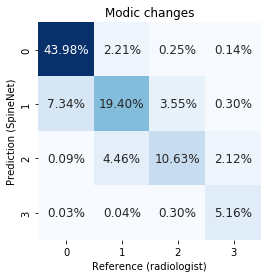

In [9]:
figsize = 4, 4
ax, axes = plt.subplots(1, 1, figsize = figsize)
sns.set(font="Times New Roman")
# ax1 = sns.heatmap(cm/np.sum(cm), annot=True,
#             fmt='.2%', xticklabels=x, yticklabels=y, cmap='Greens', cbar = False)
#
# ax1.set(title="Pfirrmann grades",
#       xlabel="Reference (radiologist)",
#       ylabel="Target (SpineNet)")
#
#
# D
#
# fig = ax1.get_figure()
# fig = ax2.get_figure()

# fig.suptitle("Contingency tables")
# fig.savefig("../output/comfusion_matrix_dd.svg")
# fig.show()


ax1 = sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues', cbar=False)

# sns.set(font="Times New Roman")
ax1.set(title="Modic changes",
      xlabel="Reference (radiologist)",
      ylabel="Prediction (SpineNet)")


# ax2 = sns.heatmap(cm/sum(cm), annot=True,
#             fmt='.2%', cmap='Blues', cbar = False, ax = axes[1])



fig = ax1.get_figure()
# fig = ax2.get_figure()

# fig.suptitle("Contingency tables")
# fig.savefig("../output/comfusion_matrix_dd.svg")
fig.show()